# <center>Telco Data - Churn Prediction</center>
---

# 1. Load data

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',500)
telcoData = pd.read_csv('/content/drive/MyDrive/AIS_DG/Telco-Churn.csv', na_values=' ')
telcoData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Clean data

คลีน Data ที่เป็น Null ทิ้งโดย
- ตรวจว่ามี Null หรือไม่
- เติม 0 แทนที่
- เช็คอีกรอบ

In [ ]:
telcoData.isnull().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
telcoData['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

TotalCharges มี Null เพราะเป็นข้อมูลกรณีของลูกค้าใหม่ ยังไม่ได้จ่ายไร

In [ ]:
telcoData.fillna(0, inplace=True)

In [ ]:
telcoData.isnull().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


เรียบร้อย

# 3. Select relevant columns

เตรียมเปลี่ยน Category เป็น Binary (พวก Female Yes No เป็น 0 1 ประมาณนั้น)

In [ ]:
telcoData.set_index('customerID', inplace=True)
telcoData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data preparation
1. Transform categorical variable into multiple binary columns (get_dummies, drop_first)
2. Concatenate with numerical data

get_dummies ก็คือไว้แปลงตัวที่เลือกเป็น 0 1 แล้วมันจะแยกเป็น Yes No Column  
 อันไหนมี 2 ค่าก็จะออกมาเป็น 2 คอลัมน์

In [ ]:
#เลือกเอาตัวที่เป็น Object หรือก็คือ Catagory มา
telcoData_copy = telcoData.select_dtypes('object')
#แปลง มันมี Yes No เลือกซักตัวมาพอละ ใช้ drop_first เอา
telcoData_copy = pd.get_dummies(telcoData_copy, drop_first=True)
#ต่อกับส่วนที่มีแต่เลข ต่อกันจากคอลัมน์ axis = 1
telcoData_num = telcoData.select_dtypes('number')
telcoData_complete = pd.concat([telcoData_copy, telcoData_num], axis=1)

In [ ]:
telcoData_complete.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,0,1,29.85,29.85
5575-GNVDE,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,0,34,56.95,1889.50
3668-QPYBK,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,0,2,53.85,108.15
7795-CFOCW,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,0,45,42.30,1840.75
9237-HQITU,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,0,2,70.70,151.65


# Activity: Sample your data
1. Sample your data into 2 sets: 70%, 30%
2. Check distribution of churn variables. See if they are still similar to the original distribution

In [ ]:
# Work here
#Train 70 Test 30 แบ่งเก็บลง train & test
from sklearn.model_selection import train_test_split
telcoData_train, telcoData_test = train_test_split(telcoData_complete, test_size=0.3)

In [ ]:
#ดูการกระจาย หรือก็คือดูว่าอัตรา Churn Train กับ Test พอกันมั้ย
#ไม่พอกันควรกลับไปพิจารณาใหม่ (Model แย่)
pd.crosstab(telcoData_train['Churn_Yes'], columns = 'p', normalize = True)

col_0,p
Churn_Yes,
False,0.735903
True,0.264097


In [ ]:
pd.crosstab(telcoData_test['Churn_Yes'], columns = 'p', normalize = True)

col_0,p
Churn_Yes,
False,0.731661
True,0.268339


ว้าวมันใกล้เคียง แสดงว่าเวิร์คแหละ Trust me bro

# 4. Train an Ensemble tree model

สร้าง Tree เปล่าๆ? ก็ Decision Tree มั้ง คิดว่า

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree = RandomForestClassifier(min_samples_leaf=10, max_depth=4)
tree.fit(telcoData_train.drop(columns='Churn_Yes'),
         telcoData_train['Churn_Yes'])

RandomForestClassifier(max_depth=4, min_samples_leaf=10)

# 6. Variable importance

ดูว่าตัวแปรสำคัญต่อการ Churn ขนาดไหน น่าจะเป็นงั้น สำคัญมากน่าจะโผล่ Decision Tree บ่อยๆ คิดว่า

In [ ]:
telcoData_train.columns[:-1]

Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'SeniorCitizen', 'tenure', 'MonthlyCharges'],
      dtype='object')

In [ ]:
tree.feature_importances_

array([0.00037129, 0.00394459, 0.00611145, 0.00129901, 0.00116813,
       0.00351712, 0.11162355, 0.02075721, 0.01560379, 0.03979346,
       0.0162694 , 0.00972458, 0.02162692, 0.00426949, 0.03411758,
       0.03261402, 0.02042043, 0.00117532, 0.01940291, 0.00090246,
       0.02850262, 0.07874583, 0.00878991, 0.00406882, 0.13784118,
       0.00101135, 0.00222178, 0.20691449, 0.05610947, 0.11108182])

In [ ]:
pd.DataFrame(dict(Feature=telcoData_train.columns[:-1],
                  Value=tree.feature_importances_))\
  .sort_values(by='Value', ascending=False)

,Feature,Value
27,SeniorCitizen,0.206914
24,PaymentMethod_Electronic check,0.137841
6,InternetService_Fiber optic,0.111624
29,MonthlyCharges,0.111082
21,Contract_Two year,0.078746
28,tenure,0.056109
9,OnlineSecurity_Yes,0.039793
14,TechSupport_No internet service,0.034118
15,TechSupport_Yes,0.032614
20,Contract_One year,0.028503


# 7. Prediction

ทำนายจาก test ใช้ Tree Predict

In [ ]:
tree.predict(telcoData_test.drop(columns='Churn_Yes'))
# threshold prob = 0.5
# max score

array([False, False, False, ..., False, False, False])

อันนี้ดูความน่าจะเป็นแต่ละตัว

In [ ]:
tree.predict_proba(telcoData_test.drop(columns='Churn_Yes'))

array([[0.89213832, 0.10786168],
       [0.72125404, 0.27874596],
       [0.96565018, 0.03434982],
       ...,
       [0.84321307, 0.15678693],
       [0.84373747, 0.15626253],
       [0.6379221 , 0.3620779 ]])

# 8. Classification report

อันนี้เอาไว้วัดผล

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
res = tree.predict(telcoData_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=telcoData_test['Churn_Yes'].values, y_pred=res))

              precision    recall  f1-score   support

       False       0.81      0.95      0.87      1546
        True       0.73      0.38      0.50       567

    accuracy                           0.80      2113
   macro avg       0.77      0.66      0.68      2113
weighted avg       0.78      0.80      0.77      2113



สนใจ Class True (1) พอ ก็คือสนใจทำนายว่าจะ Churn ชิ่งหนี

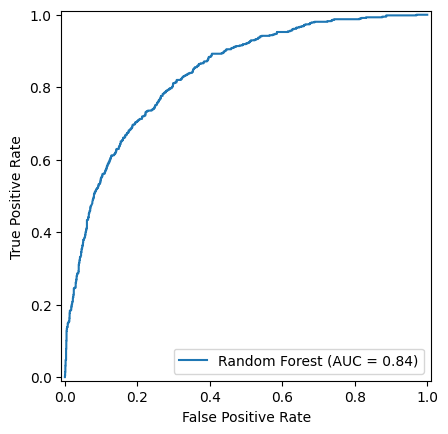

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

y_res = tree.predict_proba(telcoData_test.drop(columns='Churn_Yes'))
fpr, tpr, thresholds = roc_curve(telcoData_test['Churn_Yes'], y_res[:,1])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Random Forest')
display.plot()

# ทำเป็น PDF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/Lecture_8_ML_Classification.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Lecture_8_ML_Classification.ipynb to html
[NbConvertApp] Writing 1532132 bytes to /content/drive/MyDrive/Colab_Notebooks/Lecture_8_ML_Classification.html
